# eQTL enrichment of gene groups

### Background

Enrichment for eQTLs of genes

### Imports

In [1]:
library(ggplot2)
library(extrafont)
library(scales)
library(reshape2)
library(forcats)
library(cowplot)
library(patchwork)
library(ggsignif)
library(rcompanion)
library(ggtext)
library(viridis)
library(stringr)

Registering fonts with R


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




In [2]:
source("https://gist.githubusercontent.com/benmarwick/2a1bb0133ff568cbe28d/raw/fb53bd97121f7f9ce947837ef1a4c65a73bffb3f/geom_flat_violin.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Ohnologs, SSDs, singletons

### Proportion affected by eQTLs

##### Bonferroni-corrected

In [3]:
genesWitheQTLTissueCountBonferroni <- read.csv("../../outputFiles/genesWitheQTLTissueCountBonferroniAndOhnologStatus.cow.csv", sep="\t")
summary(genesWitheQTLTissueCountBonferroni)

       X         expressedTissues Ensembl.Gene.ID    affectedTissues 
 Min.   :    0   Min.   : 1.00    Length:19423       Min.   : 0.000  
 1st Qu.: 4856   1st Qu.:15.00    Class :character   1st Qu.: 0.000  
 Median : 9711   Median :23.00    Mode  :character   Median : 1.000  
 Mean   : 9711   Mean   :18.07                       Mean   : 1.485  
 3rd Qu.:14566   3rd Qu.:23.00                       3rd Qu.: 2.000  
 Max.   :19422   Max.   :23.00                       Max.   :20.000  
 Chromosome.scaffold.name Gene.start..bp.     Gene.end..bp.      
 Min.   : 1.00            Min.   :     2175   Min.   :     2426  
 1st Qu.: 6.00            1st Qu.: 23888692   1st Qu.: 23938592  
 Median :13.00            Median : 44595584   Median : 44621130  
 Mean   :13.14            Mean   : 49591908   Mean   : 49638920  
 3rd Qu.:19.00            3rd Qu.: 69513694   3rd Qu.: 69552788  
 Max.   :29.00            Max.   :158390488   Max.   :158415855  
     Strand             type           propOfExp

In [4]:
genesWitheQTLTissueCountBonferroni$affected <- 'N'
genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$affectedTissues > 0),]$affected <- 'Y'

In [5]:
summary(genesWitheQTLTissueCountBonferroni)

       X         expressedTissues Ensembl.Gene.ID    affectedTissues 
 Min.   :    0   Min.   : 1.00    Length:19423       Min.   : 0.000  
 1st Qu.: 4856   1st Qu.:15.00    Class :character   1st Qu.: 0.000  
 Median : 9711   Median :23.00    Mode  :character   Median : 1.000  
 Mean   : 9711   Mean   :18.07                       Mean   : 1.485  
 3rd Qu.:14566   3rd Qu.:23.00                       3rd Qu.: 2.000  
 Max.   :19422   Max.   :23.00                       Max.   :20.000  
 Chromosome.scaffold.name Gene.start..bp.     Gene.end..bp.      
 Min.   : 1.00            Min.   :     2175   Min.   :     2426  
 1st Qu.: 6.00            1st Qu.: 23888692   1st Qu.: 23938592  
 Median :13.00            Median : 44595584   Median : 44621130  
 Mean   :13.14            Mean   : 49591908   Mean   : 49638920  
 3rd Qu.:19.00            3rd Qu.: 69513694   3rd Qu.: 69552788  
 Max.   :29.00            Max.   :158390488   Max.   :158415855  
     Strand             type           propOfExp

In [6]:
table(genesWitheQTLTissueCountBonferroni[,c("type","affected")])

           affected
type           N    Y
  ohno      2126 3821
  singleton 1360 2431
  SSD       3906 5779

In [7]:
(Xsq <- chisq.test(table(genesWitheQTLTissueCountBonferroni[,c("type","affected")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test

data:  table(genesWitheQTLTissueCountBonferroni[, c("type", "affected")])
X-squared = 42.331, df = 2, p-value = 6.427e-10


           affected
type           N    Y
  ohno      2126 3821
  singleton 1360 2431
  SSD       3906 5779

,N,Y
ohno,2263.308,3683.692
singleton,1442.778,2348.222
SSD,3685.915,5999.085


           affected
type                N         Y
  ohno      -4.402586  4.402586
  singleton -3.086541  3.086541
  SSD        6.505027 -6.505027

In [8]:
round(3821/(3821+2126), 3)

[1] 0.643

In [9]:
round(2431/(2431+1360), 3)

[1] 0.641

In [10]:
round(5779/(5779+3906), 3)

[1] 0.597

In [11]:
#p.adjust(Xsq$p.value, method="bonferroni", n=10)

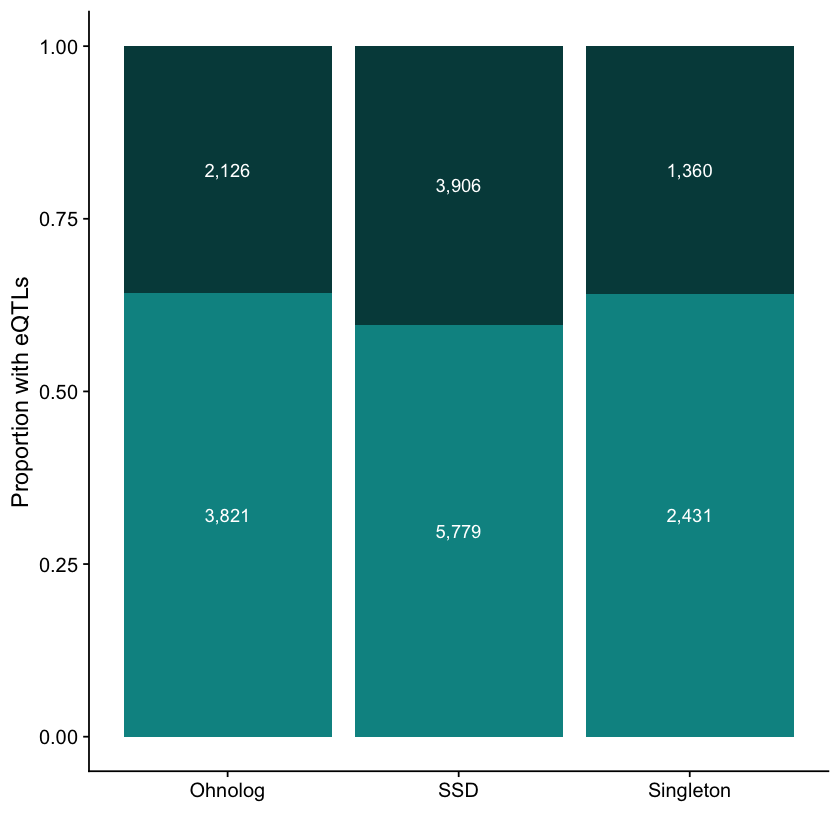

In [12]:
ohnolog_bar_chart_bonferroni <- ggplot(data=melt(table(genesWitheQTLTissueCountBonferroni[,c("type","affected")])), aes(type, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affected), stat="identity", position="fill") +
    scale_y_continuous(name="Proportion with eQTLs") +
    scale_x_discrete(name="",
        limits=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    scale_fill_manual(values=c("#009292", "#004949"),
        name="",
        breaks=c("Y", "N"),
        labels=c("Have eQTLs", "eQTL-free")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affected),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "none") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

ohnolog_bar_chart_bonferroni

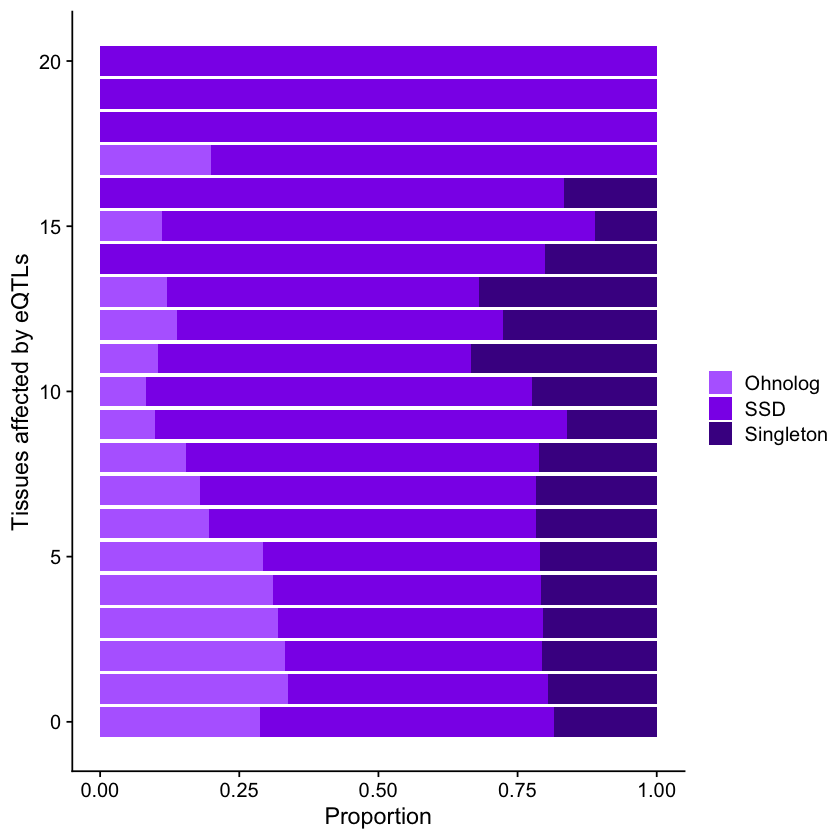

In [13]:
genesWitheQTLTissueCountBonferroni$type2 <- factor(genesWitheQTLTissueCountBonferroni$type, levels = c('ohno', 'SSD', 'singleton'))
ohno_bar_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroni, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = type2),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="Tissues affected by eQTLs") +
    scale_fill_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    theme(legend.position="right") + coord_flip()
ohno_bar_bonferroni

In [14]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]

In [15]:
summary(genesWitheQTLTissueCountBonferroniWithoutZero)

       X         expressedTissues Ensembl.Gene.ID    affectedTissues 
 Min.   :    0   Min.   : 1.00    Length:12031       Min.   : 1.000  
 1st Qu.: 3929   1st Qu.:21.00    Class :character   1st Qu.: 1.000  
 Median : 7879   Median :23.00    Mode  :character   Median : 2.000  
 Mean   : 8115   Mean   :20.49                       Mean   : 2.397  
 3rd Qu.:12009   3rd Qu.:23.00                       3rd Qu.: 3.000  
 Max.   :19405   Max.   :23.00                       Max.   :20.000  
 Chromosome.scaffold.name Gene.start..bp.     Gene.end..bp.      
 Min.   : 1.0             Min.   :    21650   Min.   :    65630  
 1st Qu.: 6.0             1st Qu.: 25255890   1st Qu.: 25295724  
 Median :13.0             Median : 46586617   Median : 46645291  
 Mean   :13.3             Mean   : 51172294   Mean   : 51218514  
 3rd Qu.:19.0             3rd Qu.: 71368657   3rd Qu.: 71409756  
 Max.   :29.0             Max.   :158390488   Max.   :158415855  
     Strand             type           propOfExp

In [16]:
nrow(genesWitheQTLTissueCountBonferroniWithoutZero)

[1] 12031

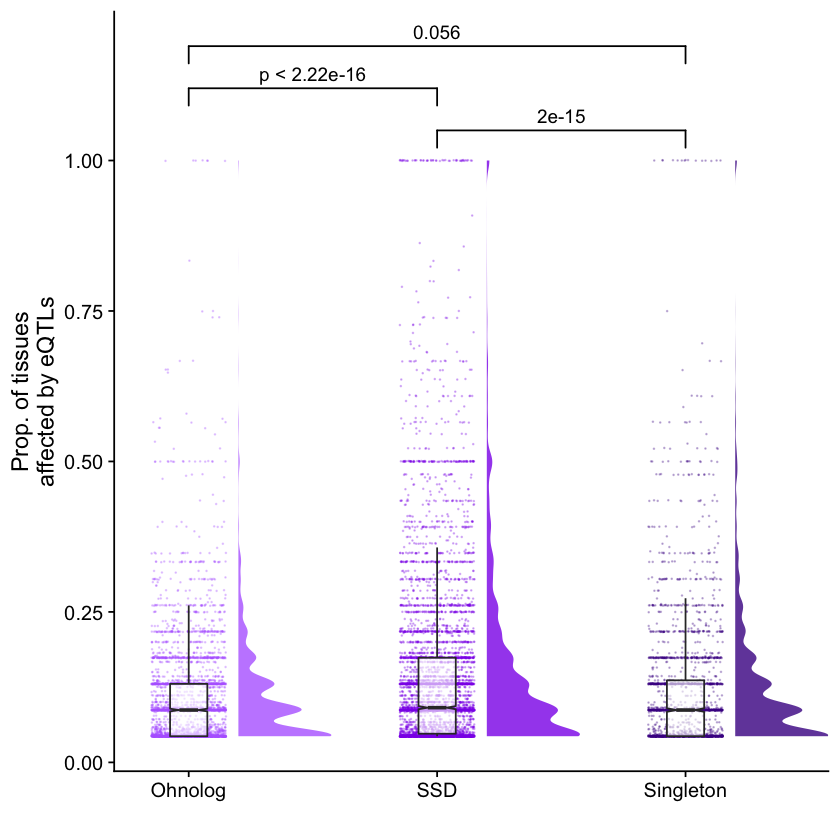

In [17]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]
ohno_raincloud_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroniWithoutZero, aes(type2, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = type2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = type2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="Prop. of tissues\naffected by eQTLs", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    scale_fill_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    theme(legend.position="none") +
    geom_signif(y_position=c(1.19, 1.12, 1.05), comparisons = list(c("ohno", "singleton"), c("ohno", "SSD"), c("SSD", "singleton")),
               textsize=4, test = "wilcox.test", )
ohno_raincloud_bonferroni

In [18]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "ohno"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "SSD"), ]$propOfExpressedAffectedByeQTL
W = 9464426, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [19]:
p.adjust(w$p.value, method="bonferroni", n=3)

[1] 1.565231e-32

In [20]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "ohno"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "singleton"), ]$propOfExpressedAffectedByeQTL
W = 4513540, p-value = 0.05632
alternative hypothesis: true location shift is not equal to 0


In [21]:
p.adjust(w$p.value, method="bonferroni", n=3)

[1] 0.1689693

In [22]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "SSD"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "singleton"), ]$propOfExpressedAffectedByeQTL
W = 7795334, p-value = 2.039e-15
alternative hypothesis: true location shift is not equal to 0


In [23]:
p.adjust(w$p.value, method="bonferroni", n=3)

[1] 6.116523e-15

In [24]:
tapply(genesWitheQTLTissueCountBonferroniWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountBonferroniWithoutZero$type, summary)

$ohno
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04348 0.04348 0.08696 0.10896 0.13043 1.00000 

$singleton
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04348 0.04348 0.08696 0.12404 0.13636 1.00000 

$SSD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04348 0.04762 0.09091 0.14880 0.17391 1.00000 


In [26]:
wilcoxonR(x = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$type,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$type),
          ci = TRUE)

,r,lower.ci,upper.ci
,<dbl>,<dbl>,<dbl>
1,-0.122,-0.141,-0.102


In [27]:
wilcoxonR(x = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$type,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$type),
          ci = TRUE)

,r,lower.ci,upper.ci
,<dbl>,<dbl>,<dbl>
1,-0.0242,-0.0498,0.00218


In [28]:
wilcoxonR(x = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$type,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$type),
          ci = TRUE)

,r,lower.ci,upper.ci
,<dbl>,<dbl>,<dbl>
1,-0.0876,-0.109,-0.0659


### Jaccard Index
[Back to top](#Outline)

In [25]:
ohnologs <- read.csv("../../datasets/geneLists/Singh and Isambert/btaurus.Pairs.Relaxed.2R.Ens96.1-X.txt")
head(ohnologs)

,Ensembl.Gene.ID
,<chr>
1,ENSBTAG00000032079
2,ENSBTAG00000021457
3,ENSBTAG00000003097
4,ENSBTAG00000016838
5,ENSBTAG00000016794
6,ENSBTAG00000014526


In [26]:
nrow(ohnologs)

[1] 6272

In [27]:
SSDsRelaxedOhnos <- read.csv("../../datasets/geneLists/SSDsRelaxedOhnos.cow.txt")
head(SSDsRelaxedOhnos)

,Ensembl.Gene.ID
,<chr>
1,ENSBTAG00000006648
2,ENSBTAG00000054829
3,ENSBTAG00000046015
4,ENSBTAG00000001150
5,ENSBTAG00000026259
6,ENSBTAG00000021253


In [28]:
nrow(SSDsRelaxedOhnos)

[1] 11243

In [29]:
singletons <- read.csv("../../datasets/geneLists/singletons.cow.txt")
head(singletons)

,Ensembl.Gene.ID
,<chr>
1,ENSBTAG00000021251
2,ENSBTAG00000051226
3,ENSBTAG00000013841
4,ENSBTAG00000011528
5,ENSBTAG00000012594
6,ENSBTAG00000018278


In [30]:
nrow(singletons)

[1] 4115

In [31]:
nonohnolog <- rbind(SSDsRelaxedOhnos, singletons)
head(nonohnolog)

,Ensembl.Gene.ID
,<chr>
1,ENSBTAG00000006648
2,ENSBTAG00000054829
3,ENSBTAG00000046015
4,ENSBTAG00000001150
5,ENSBTAG00000026259
6,ENSBTAG00000021253


In [32]:
nrow(nonohnolog)

[1] 15358

In [33]:
PCGenes <- read.csv("../../datasets/geneLists/Ensembl/CowV96/EnsV96CowProteinCodingGenes1-X.txt", sep="\t")
names(PCGenes)[names(PCGenes) == 'Gene.stable.ID'] <- 'Ensembl.Gene.ID'
head(PCGenes)

,Ensembl.Gene.ID,Chromosome.scaffold.name,Gene.start..bp.,Gene.end..bp.,Strand
,<chr>,<chr>,<int>,<int>,<int>
1,ENSBTAG00000006648,1,339070,350389,-1
2,ENSBTAG00000054829,1,626079,668340,1
3,ENSBTAG00000001753,1,764121,820845,-1
4,ENSBTAG00000046015,1,141872518,141872892,1
5,ENSBTAG00000021251,1,142011078,142037290,-1
6,ENSBTAG00000020035,1,882081,1002223,1


#### Bonferroni-corrected eQTLs

In [34]:
library(GeneOverlap)

Registered S3 method overwritten by 'gplots':
  method         from     
  reorder.factor DescTools



In [35]:
eQTLs = list()
tested = list()
forJaccardY = list()
forJaccardN = list()

for (tissue in c('Adipose',
'Blood',
'Embryo',
'Hypothalamus',
'Intramuscular_fat',
'Jejunum',
'Kidney',
'Leukocyte',
'Liver',
'Lung',
'Lymph_node',
'Macrophage',
'Mammary',
'Milk_cell',
'Monocytes',
'Muscle',
'Ovary',
'Oviduct',
'Pituitary',
'Rumen',
'Spleen',
'Testis',
'Uterus')){
    
    eQTLs[[tissue]] <- data.frame(unique(read.table(paste0("../../datasets/cGTEx/cis-eQTL_Summary_Statistics/significant_after_correction/BonferroniCorrectedToo/", tissue, ".nominals.sig.txt"), header = TRUE)$pid))
    colnames(eQTLs[[tissue]]) <- c('Ensembl.Gene.ID')
    eQTLs[[tissue]] <- merge(eQTLs[[tissue]],PCGenes,by="Ensembl.Gene.ID")
    
    tested[[tissue]] <- data.frame(read.table(paste0("../../datasets/cGTEx/cis-eQTL_Summary_Statistics/", 'Adipose', ".permutations.2rd.txt"))$V1)
    colnames(tested[[tissue]]) <- c('Ensembl.Gene.ID')
    tested[[tissue]] <- merge(tested[[tissue]],PCGenes,by="Ensembl.Gene.ID")
    
    tested[[tissue]]$eQTL[tested[[tissue]]$Ensembl.Gene.ID %in% eQTLs[[tissue]]$Ensembl.Gene.ID] <- 'Y'
    tested[[tissue]]$eQTL[!tested[[tissue]]$Ensembl.Gene.ID %in% eQTLs[[tissue]]$Ensembl.Gene.ID] <- 'N'
    
    tested[[tissue]]$ohnolog[tested[[tissue]]$Ensembl.Gene.ID %in% ohnologs$Ensembl.Gene.ID] <- 'Y'
    tested[[tissue]]$ohnolog[tested[[tissue]]$Ensembl.Gene.ID %in% nonohnolog$Ensembl.Gene.ID] <- 'N'
    
    forJaccardY[[tissue]] <- subset(tested[[tissue]], ohnolog == 'Y' & eQTL == 'Y', select=c(Ensembl.Gene.ID))$Ensembl.Gene.ID
    forJaccardN[[tissue]] <- subset(tested[[tissue]], ohnolog == 'N' & eQTL == 'Y', select=c(Ensembl.Gene.ID))$Ensembl.Gene.ID
}

In [36]:
goY <- newGOM(forJaccardY, genome.size=12031)
goN <- newGOM(forJaccardN, genome.size=12031)

In [37]:
jaccardY <- getMatrix(goY, "Jaccard")
jaccardN <- getMatrix(goN, "Jaccard")

In [38]:
jaccardY

,Blood,Embryo,Hypothalamus,Intramuscular_fat,Jejunum,Kidney,Leukocyte,Liver,Lung,Lymph_node,⋯,Milk_cell,Monocytes,Muscle,Ovary,Oviduct,Pituitary,Rumen,Spleen,Testis,Uterus
Adipose,0.04874835,0.02663438,0.076923077,0.03873239,0.04587156,0,0.027027027,0.07356322,0.054687500,0.06113537,⋯,0.009174312,0.026070764,0.064220183,0.05691057,0.01967213,0.08050847,0.07291667,0.000000000,0.011299435,0.091816367
Blood,0.00000000,0.05465839,0.027609428,0.09389671,0.02176871,0,0.013850416,0.16701903,0.084279737,0.11533587,⋯,0.018404908,0.110097324,0.155299056,0.01994681,0.03190104,0.02962963,0.06372240,0.002787456,0.004146510,0.095667870
Embryo,0.00000000,0.00000000,0.008450704,0.03725782,0.01212121,0,0.006802721,0.05050505,0.027027027,0.04042179,⋯,0.012422360,0.028169014,0.042338710,0.01385042,0.01707317,0.01120448,0.03187251,0.000000000,0.003521127,0.046474359
Hypothalamus,0.00000000,0.00000000,0.000000000,0.02544031,0.02531646,0,0.024793388,0.03703704,0.055679287,0.05263158,⋯,0.026666667,0.031914894,0.044848485,0.03191489,0.02510460,0.08620690,0.04531722,0.000000000,0.008928571,0.057142857
Intramuscular_fat,0.00000000,0.00000000,0.000000000,0.00000000,0.02669405,0,0.013157895,0.09041591,0.082666667,0.08751793,⋯,0.014432990,0.070221066,0.136363636,0.04109589,0.04480287,0.02929688,0.04907975,0.002293578,0.002222222,0.060880829
Jejunum,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0,0.063829787,0.04326329,0.039260970,0.03394256,⋯,0.023622047,0.024444444,0.038413879,0.04294479,0.01843318,0.06451613,0.05573770,0.000000000,0.011363636,0.043378995
Kidney,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0,0.000000000,0.00000000,0.005249344,0.00304878,⋯,0.016129032,0.002544529,0.001298701,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.000000000
Leukocyte,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0,0.000000000,0.01639344,0.012285012,0.01704545,⋯,0.010989011,0.021739130,0.012658228,0.02325581,0.00000000,0.04098361,0.01428571,0.000000000,0.000000000,0.019464720
Liver,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0,0.000000000,0.00000000,0.093661306,0.09542744,⋯,0.013333333,0.075576037,0.162650602,0.02816901,0.02885683,0.05832321,0.09946524,0.000000000,0.006329114,0.132424537
Lung,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0,0.000000000,0.00000000,0.000000000,0.11671924,⋯,0.020785219,0.070637119,0.091081594,0.03433476,0.01912046,0.04835165,0.06197655,0.005194805,0.007537688,0.103299857


In [39]:
jaccardN[jaccardN == 0] <- NA
jaccardY[jaccardY == 0] <- NA
melted_jaccardY <- melt(jaccardY)
melted_jaccardN <- melt(jaccardN)

In [40]:
melted_jaccardY

Var1,Var2,value
<fct>,<fct>,<dbl>
Adipose,Blood,0.04874835
Blood,Blood,NA
Embryo,Blood,NA
Hypothalamus,Blood,NA
Intramuscular_fat,Blood,NA
Jejunum,Blood,NA
Kidney,Blood,NA
Leukocyte,Blood,NA
Liver,Blood,NA


In [41]:
na.omit(melted_jaccardY[order(melted_jaccardY$value),])

,Var1,Var2,value
,<fct>,<fct>,<dbl>
227,Kidney,Macrophage,0.000842460
315,Kidney,Muscle,0.001298701
445,Intramuscular_fat,Testis,0.002222222
423,Intramuscular_fat,Spleen,0.002293578
293,Kidney,Monocytes,0.002544529
483,Spleen,Uterus,0.002544529
434,Muscle,Spleen,0.002587322
420,Blood,Spleen,0.002787456
429,Lymph_node,Spleen,0.003012048


In [42]:
wilcox.test(na.omit(melted_jaccardY)$value, na.omit(melted_jaccardN)$value)


	Wilcoxon rank sum test with continuity correction

data:  na.omit(melted_jaccardY)$value and na.omit(melted_jaccardN)$value
W = 14438, p-value = 1.06e-13
alternative hypothesis: true location shift is not equal to 0


In [43]:
summary(na.omit(melted_jaccardY)$value)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0008425 0.0174471 0.0346410 0.0459447 0.0677233 0.2226891 

In [44]:
summary(na.omit(melted_jaccardN)$value)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0003069 0.0404033 0.0699244 0.0846798 0.1224432 0.2572988 

In [45]:
melted_jaccardY$ohnolog <- 'Y'
melted_jaccardN$ohnolog <- 'N'
mergedForPlotOfJaccardIndex <- rbind(na.omit(melted_jaccardY),na.omit(melted_jaccardN))
mergedForPlotOfJaccardIndex

,Var1,Var2,value,ohnolog
,<fct>,<fct>,<dbl>,<chr>
1,Adipose,Blood,0.048748353,Y
23,Adipose,Embryo,0.026634383,Y
24,Blood,Embryo,0.054658385,Y
45,Adipose,Hypothalamus,0.076923077,Y
46,Blood,Hypothalamus,0.027609428,Y
47,Embryo,Hypothalamus,0.008450704,Y
67,Adipose,Intramuscular_fat,0.038732394,Y
68,Blood,Intramuscular_fat,0.093896714,Y
69,Embryo,Intramuscular_fat,0.037257824,Y


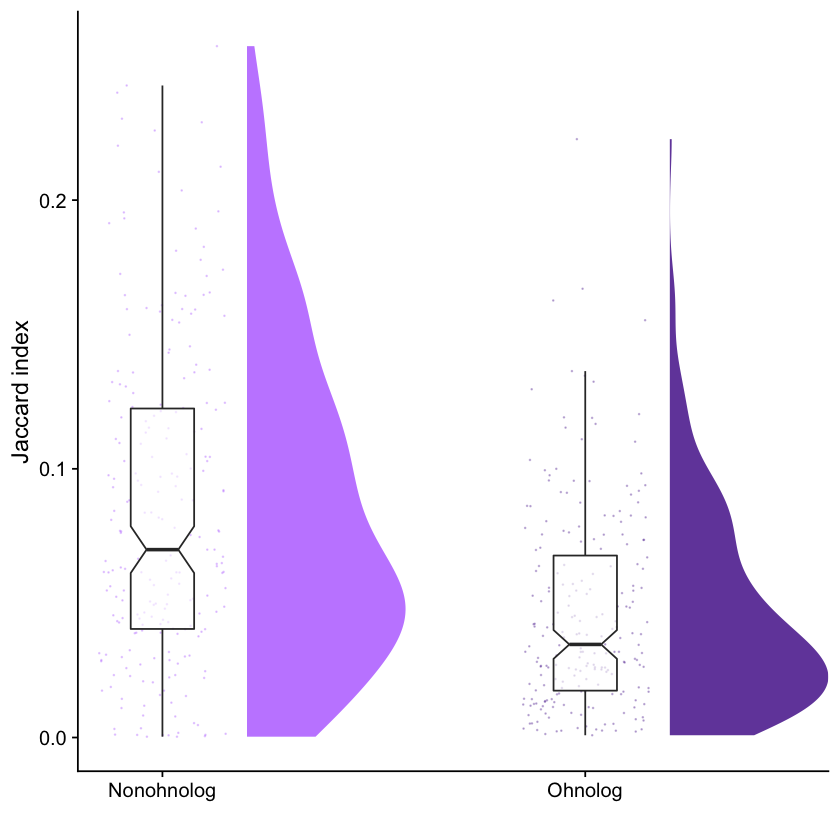

In [46]:
jaccardDist <- ggplot(mergedForPlotOfJaccardIndex, aes(ohnolog, value)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = ohnolog), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = ohnolog), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="Jaccard index") +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Nonohnolog", "Ohnolog"),
        expand=c(.1,.1)) +
    scale_color_manual(values=c("#b66dff", "#490092"),
        name="",
        breaks=c("N", "Y"),
        labels=c("Nonohnolog", "Ohnolog")) +
    scale_fill_manual(values=c("#b66dff", "#490092"),
        name="",
        breaks=c("N", "Y"),
        labels=c("Nonohnolog", "Ohnolog")) +
    theme(legend.position="none")
jaccardDist

In [47]:
ggsave("../../outputFiles/figures/eQTLJaccardIndexBonferroniOhnologRaincloudPlot.cow.svg", plot = last_plot(), width=8, height=10, units="cm")

In [48]:
colnames(melted_jaccardY) <- c("Var2","Var1","value","ohnolog")
neccessaryForOrder1<-data.frame("Adipose","Adipose",NA,NA)
names(neccessaryForOrder1)<-c("Var1","Var2","value","ohnolog")
melted_jaccard <- rbind(neccessaryForOrder1,na.omit(melted_jaccardY), na.omit(melted_jaccardN))

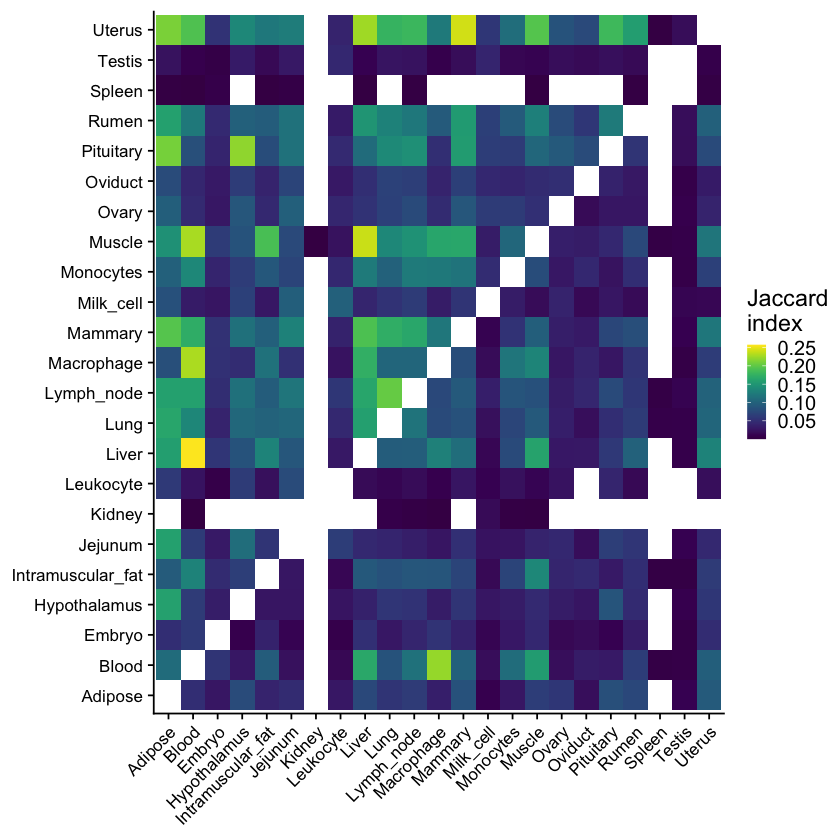

In [49]:
jaccardHeatmap <- ggplot(data = na.omit(melted_jaccard), aes(x=Var1, y=Var2, fill=value)) + 
    geom_tile() +
    theme_cowplot() +
    scale_fill_viridis("Jaccard\nindex", na.value = 'white',direction = 1) +
    theme(legend.key.size= unit(0.4, "cm"),
          legend.position="right",
          legend.direction = "vertical",
          axis.text.x=element_text(angle = 45, vjust = 1, hjust=1, size = rel(0.85)),
          #axis.text.x=element_blank(),
          #axis.ticks.x=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(size = rel(0.85)),
          axis.title.y=element_blank()) +
    scale_y_discrete(limits = rev(levels(melted_jaccard$Var2)))
jaccardHeatmap

In [50]:
ggsave('../../outputFiles/figures/eQTLJaccardIndexBonferroniOhnologHeatmap.cow.svg', plot = last_plot(), width = 27, height = 19, units = c("cm"))

---

### Proportion of genes affected by eQTLs per tissue
[Back to top](#Outline)

In [51]:
tissue_list <- c() 
eqtl_list <- c()
ohnolog_list <- c()
count_list <- c()

for (tissue in c('Adipose',
'Blood',
'Embryo',
'Hypothalamus',
'Intramuscular_fat',
'Jejunum',
'Kidney',
'Leukocyte',
'Liver',
'Lung',
'Lymph_node',
'Macrophage',
'Mammary',
'Milk_cell',
'Monocytes',
'Muscle',
'Ovary',
'Oviduct',
'Pituitary',
'Rumen',
'Spleen',
'Testis',
'Uterus')){
    
    for (option1 in c('Y',
                'N')){
        
        for (option2 in c('Y',
                'N')){
    
            tissue_list <- c(tissue_list, tissue)
            ohnolog_list <- c(ohnolog_list, option1)
            eqtl_list <- c(eqtl_list, option2)
            count_list <- c(count_list, nrow(subset(tested[[tissue]], ohnolog == option1 & eQTL == option2, select=c(Ensembl.Gene.ID))))
        }
    }
}

In [52]:
eQTLOhnologCountPerTissue <- data.frame(tissue_list,
                                        ohnolog_list,
                                        eqtl_list,
                                        count_list)
names(eQTLOhnologCountPerTissue) <- c('tissue',
                                      'ohnolog',
                                      'eqtl',
                                      'count')
eQTLOhnologCountPerTissue

tissue,ohnolog,eqtl,count
<chr>,<chr>,<chr>,<int>
Adipose,Y,Y,159
Adipose,Y,N,5054
Adipose,N,Y,566
Adipose,N,N,10196
Blood,Y,Y,1433
Blood,Y,N,3780
Blood,N,Y,3250
Blood,N,N,7512
Embryo,Y,Y,265


In [67]:
eQTLOhnologCountPerTissue %>%
  group_by(tissue, ohnolog)  %>%
    mutate(countTO = sum(count)) %>%
    group_by(eqtl, add=TRUE) %>%
    mutate(per=paste0(round(100*count/countTO,2),'%')) %>%
    filter(eqtl == 'Y')

tissue,ohnolog,eqtl,count,countTO,per
<chr>,<chr>,<chr>,<int>,<int>,<chr>
Adipose,Y,Y,159,5213,3.05%
Adipose,N,Y,566,10762,5.26%
Blood,Y,Y,1433,5213,27.49%
Blood,N,Y,3250,10762,30.2%
Embryo,Y,Y,265,5213,5.08%
Embryo,N,Y,554,10762,5.15%
Hypothalamus,Y,Y,93,5213,1.78%
Hypothalamus,N,Y,336,10762,3.12%
Intramuscular_fat,Y,Y,431,5213,8.27%


In [ ]:
# Kidney, Macrophage, Spleen

In [57]:
summary(eQTLOhnologCountPerTissue)

    tissue            ohnolog              eqtl               count        
 Length:92          Length:92          Length:92          Min.   :    1.0  
 Class :character   Class :character   Class :character   1st Qu.:  372.8  
 Mode  :character   Mode  :character   Mode  :character   Median : 3515.0  
                                                          Mean   : 3993.8  
                                                          3rd Qu.: 5786.2  
                                                          Max.   :10761.0  

In [29]:
eQTLOhnologCountPerTissue <- read.csv("../../outputFiles/eQTLOhnologCountPerTissue.tsv", sep="\t", header=FALSE)
summary(eQTLOhnologCountPerTissue)

Warning message in file(file, "rt"):
“cannot open file '../../outputFiles/eQTLOhnologCountPerTissue.tsv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [58]:
#nonohnolog vs ohnolog
tapply(eQTLOhnologCountPerTissue$count, eQTLOhnologCountPerTissue$ohnolog, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   603.2  5381.0  5381.0 10158.8 10761.0 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2     256    2606    2606    4957    5211 


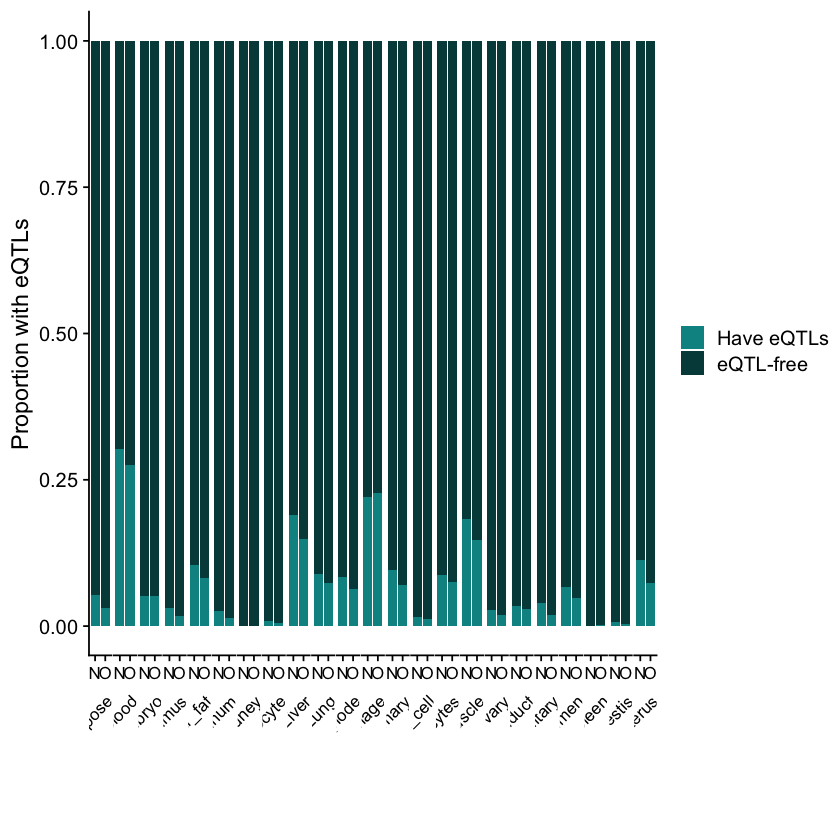

In [117]:
perTissueBarPlot <- ggplot(eQTLOhnologCountPerTissue, aes(x=ohnolog, y=count, fill=factor(eqtl))) +
    theme_cowplot() +
    geom_bar(stat="identity", position="fill") +
    facet_wrap(~tissue, strip.position = "bottom", scales="free_x", nrow=1) +
    theme(strip.placement = "outside", panel.spacing = unit(0.1, 'lines'), strip.background = element_blank(), strip.text.x = element_text(angle = 45, vjust = 1, hjust=1, size = rel(0.85)), axis.text.x = element_text(size = rel(0.85))) +
    scale_y_continuous(name="Proportion with eQTLs") +
    scale_x_discrete(name="",
        breaks=c("Y", "N"),
        labels=c("O", "N")) +
    scale_fill_manual(values=c("#009292", "#004949"),
        name="",
        breaks=c("Y", "N"),
        labels=c("Have eQTLs", "eQTL-free")) + 
    theme(legend.position = "right")
perTissueBarPlot

In [60]:
ggsave('../../outputFiles/figures/eQTLOhnologCountPerTissueBonferroni.cow.svg', plot = last_plot(), width = 30, height = 15.5, units = c("cm"))

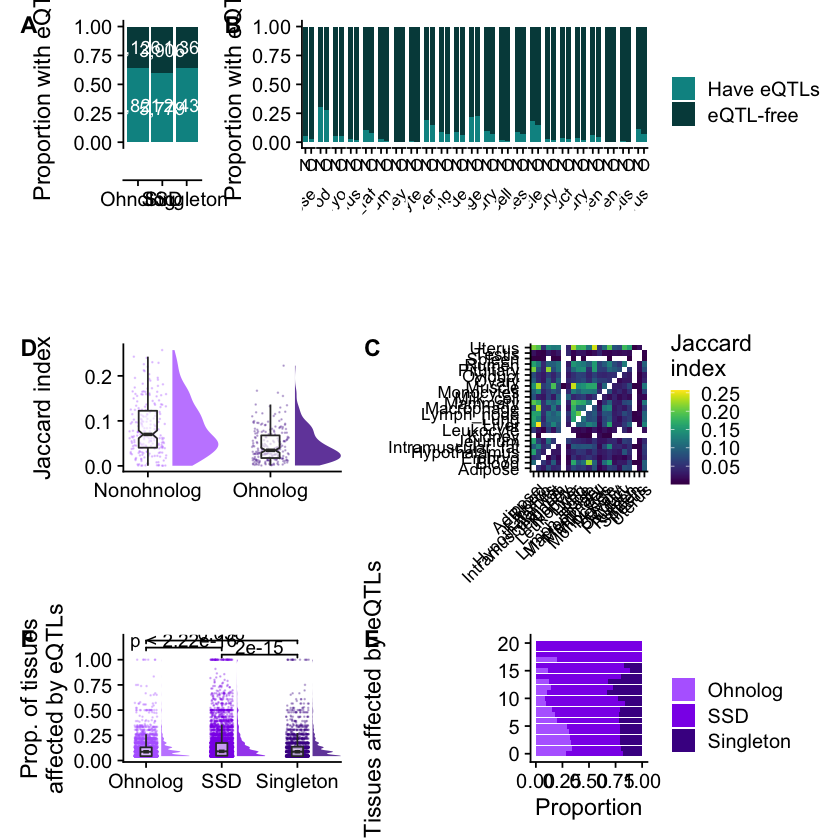

In [129]:
layout <- "
AABBBB
DDDCCC
FFFEEE
"
ohnolog_bar_chart_bonferroni + perTissueBarPlot + jaccardHeatmap + jaccardDist + ohno_bar_bonferroni + ohno_raincloud_bonferroni + plot_layout(design = layout) + plot_annotation(tag_levels = 'A')

In [130]:
ggsave('../../outputFiles/figures/cowData.svg', plot = last_plot(), width = 28, height = 30, units = c("cm"))